In [1]:

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import analyze_load_utils
import analyze_utils

# EXPERIMENT CONFIGURATION

In [2]:
BASE = 'MAZE'
ENV = "Maze7-v0" 
ER_SAMPLES_NUMBER_LIST = [1,3,5,13]
EXPERIMENT_NAME = "70"

config = analyze_utils.AnalyzerConfiguration(
  BASE_NAME=BASE, 
  EXP_NAME=EXPERIMENT_NAME,
  ENV_NAME=ENV,
  M=ER_SAMPLES_NUMBER_LIST,
  DATA_BASE_PATH=BASE)



In [3]:
loader = analyze_load_utils.Loader(BASE, EXPERIMENT_NAME, ENV, BASE, ER_SAMPLES_NUMBER_LIST)
acs2_data, acs2er_data = loader.load()

In [4]:
import importlib
importlib.reload(analyze_utils)
analyzer = analyze_utils.Analyzer(acs2_data, acs2er_data, config)

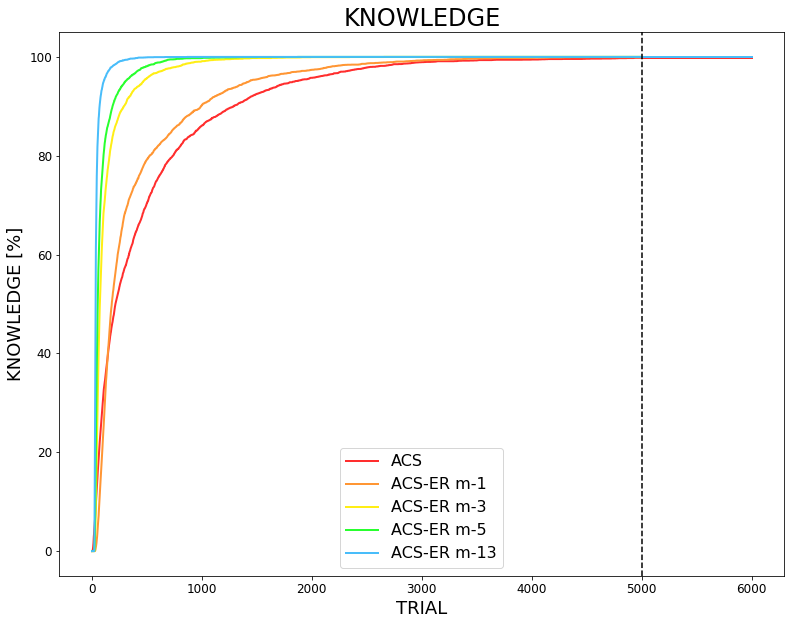

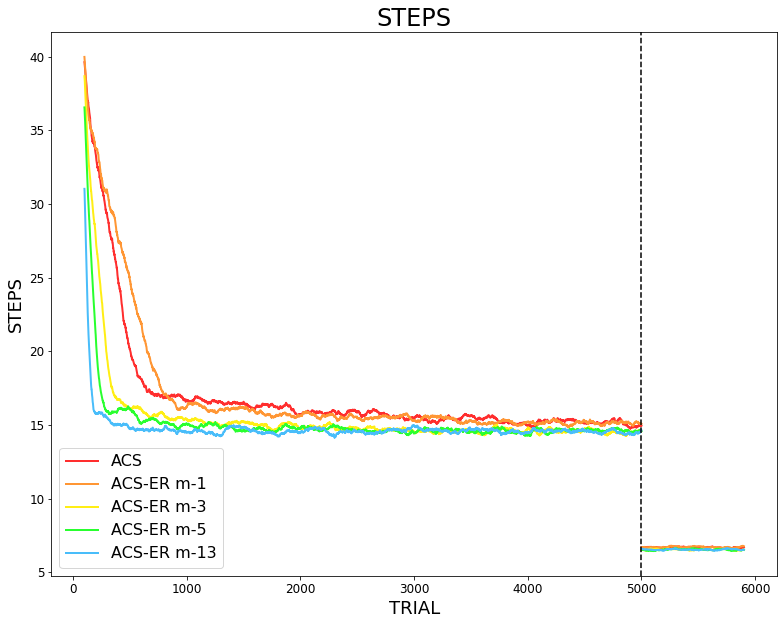

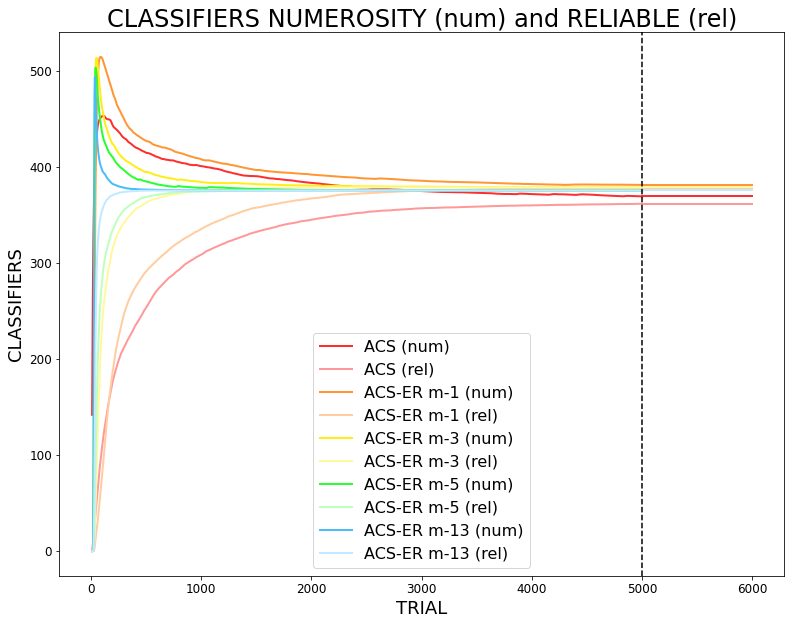

In [6]:
analyzer.plot_knowledge()
analyzer.plot_steps(exploit_avg_win=100, explore_avg_win=100)
analyzer.plot_classifiers(exploit_avg_win=10, explore_avg_win=10)